# Using the anomaly detection methods available in neuropy to detect outliers

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
current_dir = os.getcwd()
os.chdir(current_dir.split("/notebooks/")[0])
from neuropy.anomaly_detection import univariate_outlier_removal, iqr_outlier_detector, std_outlier_detector
os.chdir(current_dir)

In [3]:
amount_of_features = 3
X, y, coef = make_regression(n_samples=100,
    n_features=amount_of_features,
    n_informative=amount_of_features,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [4]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [5]:
df=df.assign(feat_extra = np.random.exponential(scale=3, size = df.shape[0]))

In [6]:
display(df.head()), print(df.shape)

,feat_0,feat_1,feat_2,target,feat_extra
0,-0.792521,0.504987,-0.114736,13.149332,1.721547
1,0.280992,-0.208122,-0.622700,-20.311291,0.088580
2,0.791032,1.402794,-0.909387,101.284137,1.870621
3,0.625667,-1.070892,-0.857158,-80.105864,5.632799
4,-0.342715,-0.161286,-0.802277,-33.212103,1.831134


(100, 5)


(None, None)

## `iqr_outlier_detector`

In [7]:
is_outlier, lower, upper = iqr_outlier_detector(df[df.columns[0]])
lower, upper

(-1.952571145231041, 1.9731140511169873)

In [8]:
df.loc[is_outlier, df.columns[0]]

5     2.122156
80    2.143944
Name: feat_0, dtype: float64

## `std_outlier_detector`

In [9]:
is_outlier, lower, upper = std_outlier_detector(df[df.columns[0]])
lower, upper

(-2.3826312646983205, 2.5661632179716007)

In [10]:
df.loc[is_outlier, df.columns[0]]

Series([], Name: feat_0, dtype: float64)

## `univariate_outlier_removal`

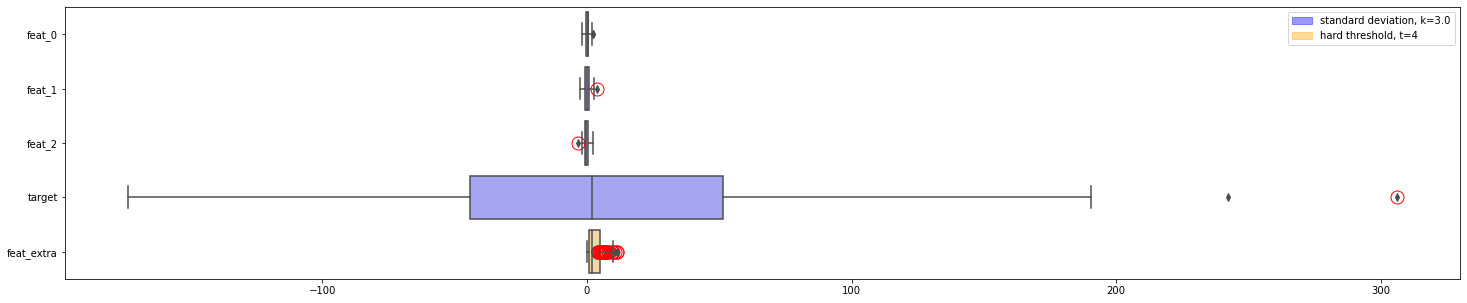

In [11]:
def some_outlier_detector(s, threshold=4.):
        to_discard = (s < -threshold) | (s > threshold)
        return to_discard.values.tolist(), -threshold, threshold
df, summary, fig = univariate_outlier_removal(df,
                                               nonparam_func=some_outlier_detector,
                                               nonparam_args={"threshold": 4.},
                                               nonparam_name="hard threshold, t=4",
                                               remove=False,
                                               plot=True,
                                               figsize=(25, 5))

In [12]:
summary

,var,method,outliers-removed,outliers-removed %,cutoff_lower,cutoff_upper,index
0,feat_0,"standard deviation, k=3.0",0,0.0,-2.382631,2.566163,[]
1,feat_1,"standard deviation, k=3.0",1,1.0,-3.263908,3.413551,[39]
2,feat_2,"standard deviation, k=3.0",1,1.0,-3.120533,2.754067,[54]
3,target,"standard deviation, k=3.0",1,1.0,-243.625924,254.518482,[39]
4,feat_extra,"hard threshold, t=4",30,30.0,-4.000000,4.000000,"[3, 8, 12, 17, 21, 22, 23, 26, 27, 29, 31, 40,..."
